# Big Mart Sales Prediction using Machine Learning with Python

## Step 1: Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Step 2: Load the Dataset

In [2]:
df = pd.read_csv('data/Train.csv')

#### Getting the first five rows

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Number of the data points and number of features.

In [4]:
df.shape

(8523, 12)

#### Get some statistical information about out dataset like min, mean, quartiles etc

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Getting some information about the dataset like data type etc.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Categorical Features:**
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

#### Find out null values if there are any

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# check how percent data is missing for each column
df.isnull().sum()*100/len(df)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

since missing values more in percentage that is >5% \
so we have to handle the missing values

In [10]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

### Handling the missing values in the data
There are multiple methods to fill missing values in the data
| Univariate Imputation | Bivariate Imputation |
| ----------- | ----------- |
| Mean Imputation      | Regression    |
| Median Imputation | KNN Imputation  |
|Mode Imputation|Machine Learning based Imputation|
|Constant value Imputation||
|Interpolation||


#### Univariate Imputation

In [12]:
mean_weight = df['Item_Weight'].mean()
median_weight = df['Item_Weight'].median()
print(mean_weight, median_weight)

12.857645184135976 12.6


In [13]:
# Filling missing values with mean and median
df['Item_Weight_mean'] = df['Item_Weight'].fillna(mean_weight)
df['Item_Weight_median'] = df['Item_Weight'].fillna(median_weight)

In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [15]:
# lets check the variance of the column after and before Imputation
print('original weight variance: ', df['Item_Weight'].var())
print('mean imputation weight variance: ', df['Item_Weight_mean'].var())
print('original median weight variance: ', df['Item_Weight_median'].var())

original weight variance:  21.561688259836558
mean imputation weight variance:  17.86012173506058
original median weight variance:  17.869561454073647


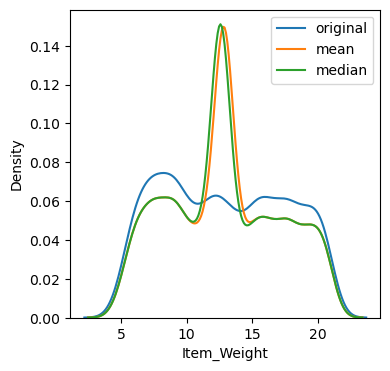

In [45]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df, x='Item_Weight', label= 'original')  
sns.kdeplot(data=df, x='Item_Weight_mean', label= 'mean')  
sns.kdeplot(data=df, x='Item_Weight_median', label= 'median')  
plt.legend()
plt.show()


we can see more values are clustered around mean and median and this is not desired.

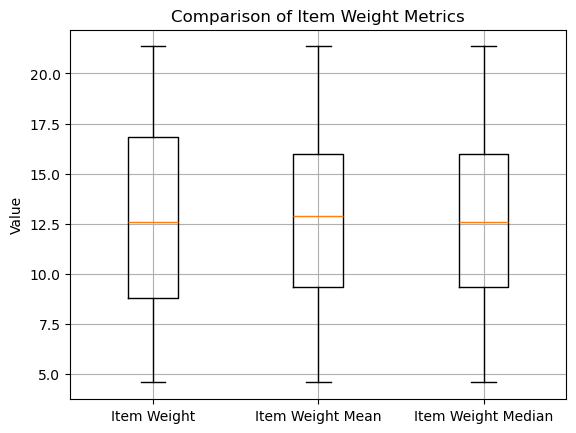

In [48]:
plt.boxplot([df[df['Item_Weight'].notna()]["Item_Weight"], df['Item_Weight_mean'], df['Item_Weight_median']], 
            tick_labels=['Item Weight', 'Item Weight Mean', 'Item Weight Median'])
plt.title('Comparison of Item Weight Metrics')
plt.grid()
plt.ylabel('Value')
plt.show()

we can see after mean and median imputation there is reduction in the data which is not desirable.\
so we are going to use the next imputation method which is `Interpolation`

In [43]:
df['Item_Weight_interpolate'] = df['Item_Weight'].interpolate(method='linear')

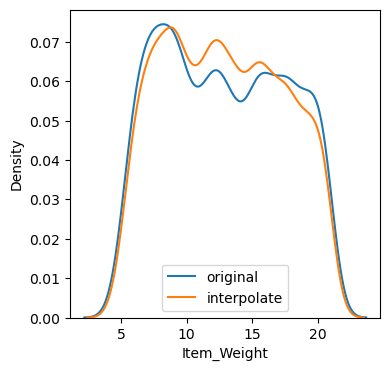

In [44]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df, x='Item_Weight', label= 'original')  
sns.kdeplot(data=df, x='Item_Weight_interpolate', label= 'interpolate')  
plt.legend()
plt.show()

we can see this imputer is better than mean and medain.

#### Bivariate/ Multivariate Imputation

In [49]:
from sklearn.impute import KNNImputer

In [50]:
knn = KNNImputer(n_neighbors=10, weights='distance')  
# Parameters:
#   n_neighbors: The number of nearest neighbors to use for imputation.

#   weights:    The weight assigned to each neighbor's contribution.
#                'distance': Neighbors are weighted by the inverse of their distance.
#                            Closer neighbors have a greater influence. This is often
#                            a good choice as closer neighbors are more likely to be
#                            similar.
#                'uniform': All neighbors are weighted equally.  This might be
#                           appropriate if you believe all neighbors are equally
#                           relevant.

In [61]:
df['knn_imputer'] = knn.fit_transform(df[['Item_Weight']])
# The double square brackets [[]] create a new DataFrame that contains only the 'Item_Weight' column.

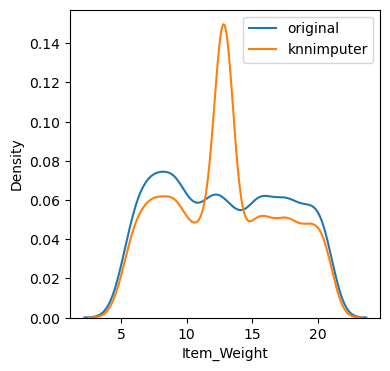

In [62]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df, x='Item_Weight', label= 'original')  
sns.kdeplot(data=df, x='knn_imputer', label= 'knnimputer')  
plt.legend()
plt.show()

so from all these methods, linear interpolation is best imputation method here.\
so we'll use the interpolate column by dropping other imputed columns.